# ACP

Les fonctionnalités de base ACP sous Python

## Liens intéressants :
https://www.ephiquant.com/reduction-de-dimension-analyse-en-composant-principal-avec-python/

https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor3-python-scikit.pdf

https://mpra.ub.uni-muenchen.de/76653/1/MPRA_paper_76653.pdf


## Démarche ACP sur un cas connu : IRIS
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Création de la matrice de données à partir d'un fichier excel
df = pd.read_excel('/content/drive/MyDrive/MT15-local/TP2_ACP/data/Iris.xlsx')
df.head(2)

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa


In [4]:
df.describe()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,1.199333,3.758000,3.057333,5.843333
std,0.819232,0.762238,1.765298,0.435866,0.828066
min,1.000000,0.100000,1.000000,2.000000,4.300000
25%,1.000000,0.300000,1.600000,2.800000,5.100000
50%,2.000000,1.300000,4.350000,3.000000,5.800000
75%,3.000000,1.800000,5.100000,3.300000,6.400000
max,3.000000,2.500000,6.900000,4.400000,7.900000


In [5]:
# Visualiser les 5 premières lignes
df.head(5)

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


### Séparation des variables quantitatives et qualitatives

In [22]:
# Sélection des variables quantitatives et conversion en forme verticale
x = df.iloc[:,1:5].values


In [7]:
# Sélection de la variable catégorielle et conversion en format vertical
y = df.iloc[:,5].values
y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

### Normalisation (centrer et réduire) des variables quantitatives

lien vers la définition de la fonction : StandardScaler :
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


In [8]:
# Import 
from sklearn.preprocessing import StandardScaler

In [9]:
# Application de StandardScaler pour center et réduire nos données quantitatives (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)
x

array([[-1.31544430e+00, -1.34022653e+00,  1.01900435e+00,
        -9.00681170e-01],
       [-1.31544430e+00, -1.34022653e+00, -1.31979479e-01,
        -1.14301691e+00],
       [-1.31544430e+00, -1.39706395e+00,  3.28414053e-01,
        -1.38535265e+00],
       [-1.31544430e+00, -1.28338910e+00,  9.82172869e-02,
        -1.50652052e+00],
       [-1.31544430e+00, -1.34022653e+00,  1.24920112e+00,
        -1.02184904e+00],
       [-1.05217993e+00, -1.16971425e+00,  1.93979142e+00,
        -5.37177559e-01],
       [-1.18381211e+00, -1.34022653e+00,  7.88807586e-01,
        -1.50652052e+00],
       [-1.31544430e+00, -1.28338910e+00,  7.88807586e-01,
        -1.02184904e+00],
       [-1.31544430e+00, -1.34022653e+00, -3.62176246e-01,
        -1.74885626e+00],
       [-1.44707648e+00, -1.28338910e+00,  9.82172869e-02,
        -1.14301691e+00],
       [-1.31544430e+00, -1.28338910e+00,  1.47939788e+00,
        -5.37177559e-01],
       [-1.31544430e+00, -1.22655167e+00,  7.88807586e-01,
      

In [10]:
# Vérification
import numpy as np
print("La moyenne : ",np.mean(x,axis=0))
print("L'écart type : ",np.std(x,axis=0))

La moyenne :  [-4.73695157e-16 -4.26325641e-16 -7.81597009e-16 -4.73695157e-16]
L'écart type :  [1. 1. 1. 1.]


### Mise en oeuvre de l'ACP

In [11]:
# Import 
from sklearn.decomposition import PCA 

In [12]:
# Instanciation de la fonction PCA avec une projection sur 2 axes 
pca = PCA(n_components = 2)

In [13]:
# Effectuer l'ACP à deux axes sur nos données
principalComponents = pca.fit_transform(x)

In [14]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

,Axe principal 1,Axe principal 2
0,-2.264703,0.480027
1,-2.080961,-0.674134


In [15]:
# Constitution de la matrice finale avec la variable qualitative
finaldf = pd.concat([principaldf, df[['Species_name']]], axis = 1)
finaldf.head(2)

,Axe principal 1,Axe principal 2,Species_name
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa


#### Méthode de représentation graphique

> Visualisation de la matrice dans ce nouveau repère

In [16]:
import matplotlib.pyplot as plt

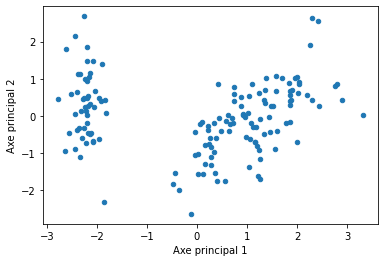

In [17]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

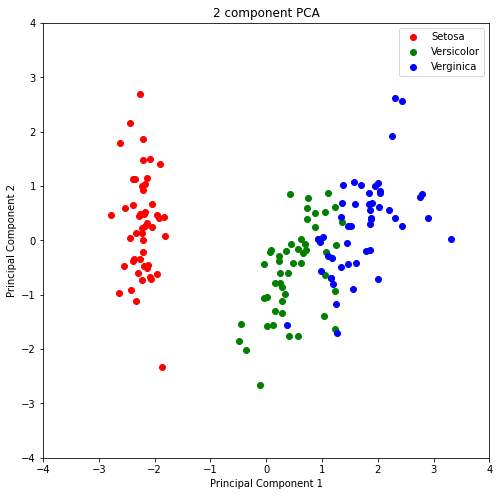

In [18]:
# Visualisation de la matrice avec distinction de l'espèce
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-4,4) #même limites en abscisse
ax.set_ylim(-4,4) #et en ordonnée

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = ['Setosa', 'Versicolor', 'Verginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas où le nom de l'espèce correspond à "target" et sera donc en couleur "color"
    indice_bool = finaldf['Species_name'] == target
    # Loc[ligne, colonne] : ici loc récupère uniquement les lignes qui correspondent à True
    ax.scatter(finaldf.loc[indice_bool, 'Axe principal 1']
               , finaldf.loc[indice_bool, 'Axe principal 2']
               , c = color)
ax.legend(targets)

In [19]:
# Si besoin de recupérer les élements uniques d'une liste
finaldf.Species_name.unique()

array(['Setosa', 'Versicolor', 'Verginica'], dtype=object)

#### Détail sur la variance : Couverture du modèle 

In [20]:
# Modèle représentatif car couvert à plus de 95%
print(pca.explained_variance_ratio_)
print("Le ratio d'inertie récupéré par les deux axes factoriels est de ", sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
Le ratio d'inertie récupéré par les deux axes factoriels est de  0.9581320720000163
